In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Company_Data.csv")

In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x576 with 0 Axes>

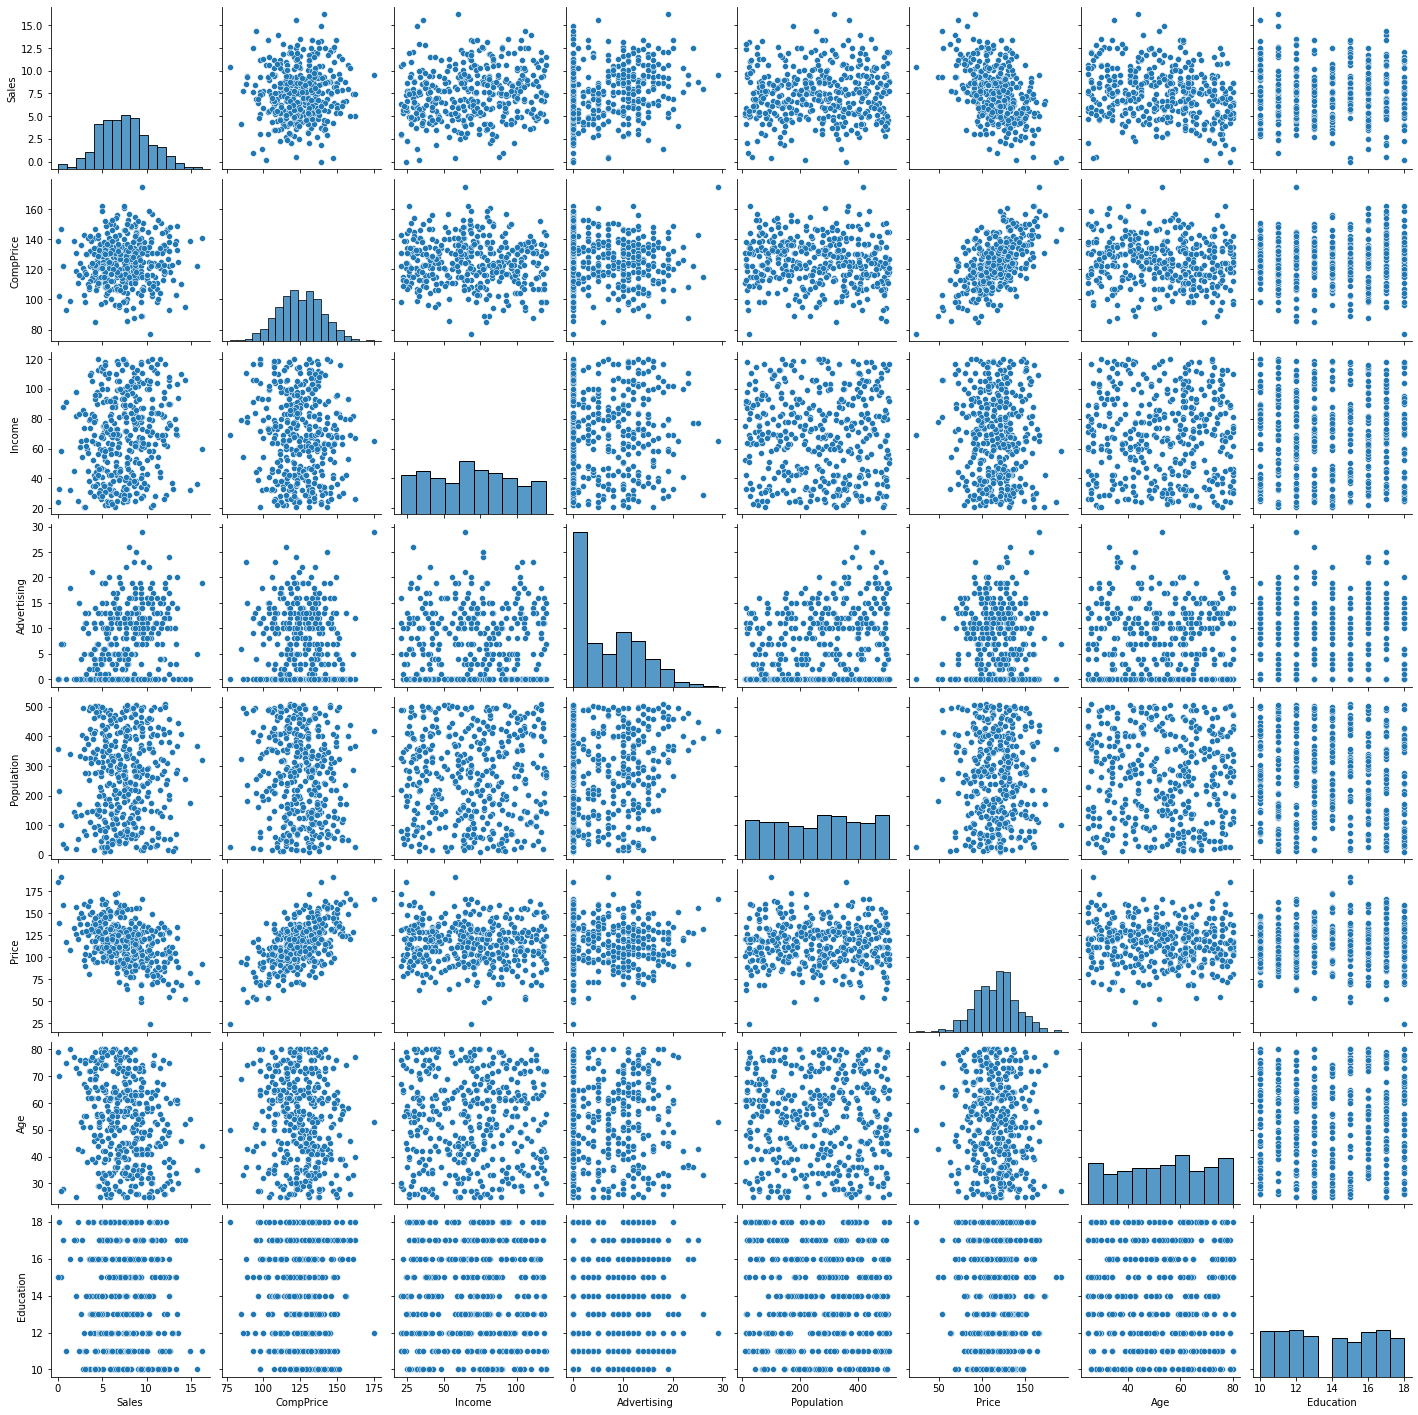

In [6]:
plt.figure(figsize=(12,8))
sns.pairplot(df)
plt.show

In [7]:
df.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes


In [8]:
df['Urban'] = df['Urban'].apply(lambda x: 1 if x== 'Yes' else 0)

In [9]:
df['US'] = df['US'].apply(lambda x: 1 if x== 'Yes' else 0)

In [10]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


In [11]:
df.Sales.value_counts()

7.80     4
6.67     3
8.77     3
9.32     3
5.87     3
        ..
8.89     1
13.39    1
9.14     1
5.07     1
9.50     1
Name: Sales, Length: 336, dtype: int64

In [12]:
df['ShelveLoc'] = df['ShelveLoc'].map({'Good':1, 'Medium':2, 'Bad': 3})

In [13]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0


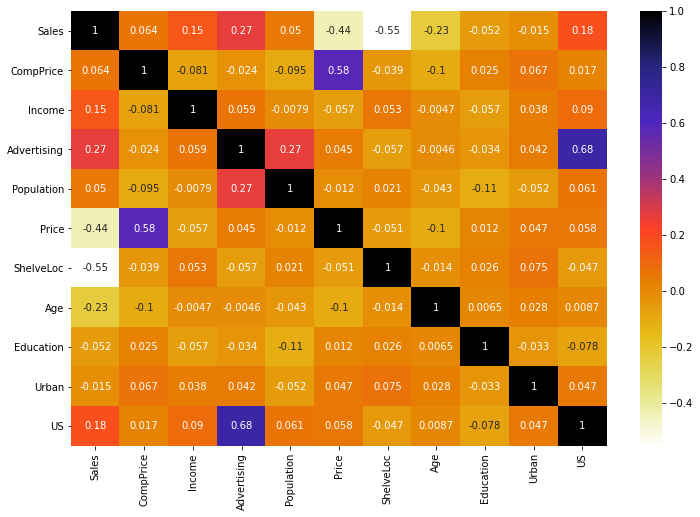

In [14]:
##All variable will be independent 
## Find the high correlated Values
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap= plt.cm.CMRmap_r)

In [15]:
## find the feature engineering correlation
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
         for j in range(i):
                if (corr_matrix.iloc[i,j])>threshold:
                    colname = corr_matrix.columns[i]
                    col_corr.add(colname)
    return col_corr

In [17]:
corr = correlation(df, 0.6)
print(f'name of the highly correlated is{corr}')

name of the highly correlated is{'US'}


In [18]:
df.drop(corr, axis=1, inplace=True)

In [19]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,9.50,138,73,11,276,120,3,42,17,1
1,11.22,111,48,16,260,83,1,65,10,1
2,10.06,113,35,10,269,80,2,59,12,1
3,7.40,117,100,4,466,97,2,55,14,1
4,4.15,141,64,3,340,128,3,38,13,1


In [20]:
#df['Sales'] = df['Sales'].apply(lambda x: '<=10' if x > 10 else '>10' )
df['Sales'] = df.Sales.astype('category')

In [21]:
train = df.iloc[:, 1:]
test = df.Sales
train.shape

(400, 9)

In [22]:
## Standart scaling data
from sklearn.preprocessing import StandardScaler

In [23]:
sd = StandardScaler()

In [24]:
train_columns = train.columns

In [25]:
train = sd.fit_transform(train)

In [26]:
train = pd.DataFrame(train, columns=train_columns)
train.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,0.850455,0.155361,0.657177,0.075819,0.177823,1.446917,-0.699782,1.184449,0.646869
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,-1.528747,0.721723,-1.490113,0.646869


In [27]:
## Put the data into train test split
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.25, random_state=0)

In [28]:
##build the model
from sklearn.ensemble import RandomForestRegressor

In [29]:
model = RandomForestRegressor(n_estimators=140, random_state=0)

In [35]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=140, random_state=0)

In [36]:
prid = model.predict(X_test)

In [37]:
random_forest_actual_pridict = pd.DataFrame({'Actual':y_test, 'Pridict': prid})

In [38]:
random_forest_actual_pridict[:10]

,Actual,Pridict
132,9.54,7.428071
309,11.18,8.064000
341,7.38,6.966357
196,4.10,3.640286
246,6.90,6.624786
60,8.32,6.914714
155,7.71,8.153357
261,5.71,6.207071
141,6.53,5.766429
214,4.83,6.231429


In [39]:
model.score(X_test,y_test)

0.7005080096828248

Baging

In [40]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [41]:
dis = DecisionTreeRegressor()

In [42]:
bag = BaggingRegressor(base_estimator=dis, n_estimators=200, max_samples=0.5, max_features=1.0, random_state=8)

In [43]:
bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.5,
                 n_estimators=200, random_state=8)

In [44]:
bag_prid = bag.predict(X_test)

In [45]:
bag_actual_prid = pd.DataFrame({'Actual': y_test, 'predict': bag_prid})

In [46]:
bag_actual_prid[:10]

,Actual,predict
132,9.54,7.79540
309,11.18,7.75930
341,7.38,7.02885
196,4.10,4.14105
246,6.90,6.59515
60,8.32,6.74700
155,7.71,8.10795
261,5.71,6.31040
141,6.53,5.40655
214,4.83,6.12275


In [47]:
bag.score(X_test, y_test)*100

69.47675783408694

Ada Boosting

In [48]:
from sklearn.ensemble import AdaBoostRegressor

In [49]:
boost = AdaBoostRegressor(base_estimator=dis, n_estimators=100, learning_rate=1)

In [50]:
boost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=1,
                  n_estimators=100)

In [51]:
boost_pred = boost.predict(X_test)

In [52]:
boost_actual_predict = pd.DataFrame({'Actual': y_test, 'Predict': boost_pred})

In [53]:
boost_actual_predict[:10]

,Actual,Predict
132,9.54,7.22
309,11.18,8.01
341,7.38,6.71
196,4.10,3.72
246,6.90,6.64
60,8.32,7.68
155,7.71,8.07
261,5.71,6.18
141,6.53,5.81
214,4.83,5.36


In [54]:
boost.score(X_test, y_test)*100

72.80929548788534